Basic Statistics:
Mean = 79.85
Variance (population) = 88.03
Standard Deviation = 9.38
Sample Variance = 92.66


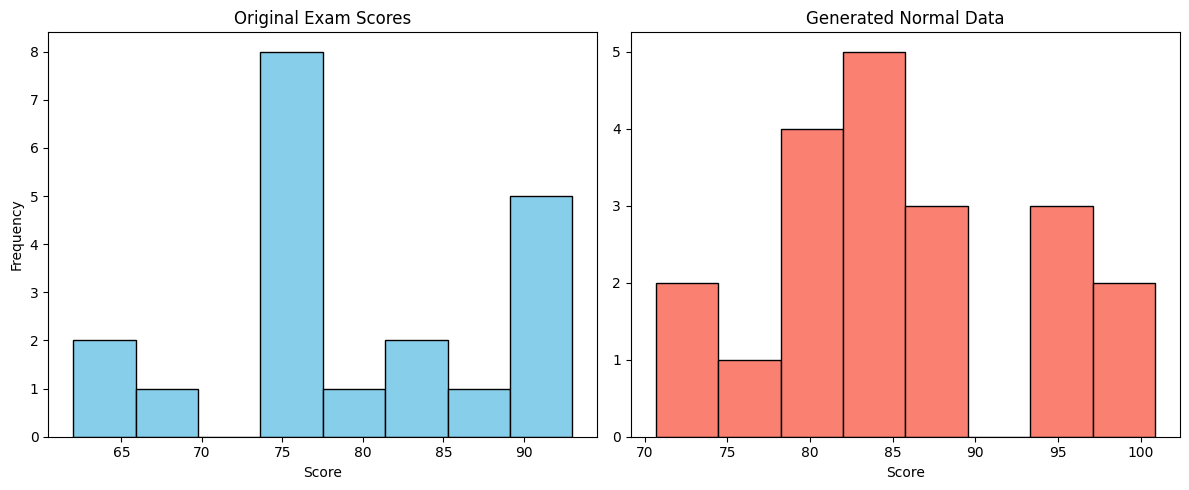


Monte Carlo Simulation:
Estimated P(score >= 75) ≈ 0.6993

Hypothesis Testing (H0: mean = 87):
t-statistic = -3.3218
p-value = 0.0036


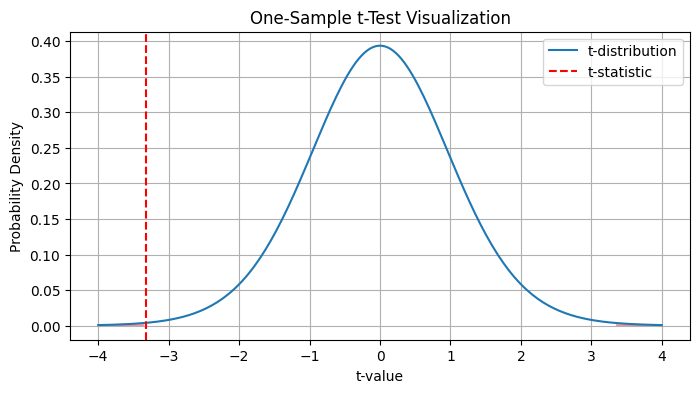

Conclusion: Reject the null hypothesis: The exam scores are significantly different from 87.


In [1]:
# Lab Test - CSE 413 (Autumn 25)
# Simulation & Modeling Lab

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Exam scores from the question
scores = np.array([93, 83, 69, 62, 75, 93, 77, 65, 93, 78, 87, 75, 76, 74, 93, 76, 76, 75, 84, 93])

### 1. Basic Statistics

# Mean, Variance, and Standard Deviation
mean_score = np.mean(scores)
var_score = np.var(scores)
std_score = np.std(scores)

print("Basic Statistics:")
print(f"Mean = {mean_score:.2f}")
print(f"Variance (population) = {var_score:.2f}")
print(f"Standard Deviation = {std_score:.2f}")

# Population vs Sample Variance
sample_variance = np.var(scores, ddof=1)
print(f"Sample Variance = {sample_variance:.2f}")

### 2. Random Number Generation

# Generate normal dataset with same mean and std
np.random.seed(0)  # for reproducibility
generated_scores = np.random.normal(loc=mean_score, scale=std_score, size=20)

# Plot histograms side-by-side
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(scores, bins=8, color='skyblue', edgecolor='black')
plt.title('Original Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(generated_scores, bins=8, color='salmon', edgecolor='black')
plt.title('Generated Normal Data')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

### 3. Monte Carlo Simulation

# Estimate P(score >= 75)
samples = np.random.normal(loc=mean_score, scale=std_score, size=100_000)
prob = np.mean(samples >= 75)

print("\nMonte Carlo Simulation:")
print(f"Estimated P(score >= 75) ≈ {prob:.4f}")

### 4. Hypothesis Testing

# H0: mean score = 87 (your ID last 3 digits = 087 → μ0 = 87)
mu_0 = 87
t_statistic, p_value = stats.ttest_1samp(scores, popmean=mu_0)

print("\nHypothesis Testing (H0: mean = 87):")
print(f"t-statistic = {t_statistic:.4f}")
print(f"p-value = {p_value:.4f}")

# Visualization of t-distribution
df = len(scores) - 1
x = np.linspace(-4, 4, 200)
y = stats.t.pdf(x, df=df)

plt.figure(figsize=(8,4))
plt.plot(x, y, label='t-distribution')
plt.axvline(t_statistic, color='red', linestyle='--', label='t-statistic')
plt.fill_between(x, y, where=(x < -abs(t_statistic)) | (x > abs(t_statistic)), color='red', alpha=0.3)
plt.title("One-Sample t-Test Visualization")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Interpretation
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The exam scores are significantly different from 87."
else:
    conclusion = "Fail to reject the null hypothesis: The exam scores are not significantly different from 87."

print("Conclusion:", conclusion)
